In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("/content/dataset.csv",index_col="DATE")

In [3]:
data.head()

,STATION,NAME,PRCP,TAVG,TMAX,TMIN
DATE,,,,,,
1990-02-14,PKM00041764,"HYDERABAD AIRPORT, PK",0.0,64,NaN,55.0
1990-02-15,PKM00041764,"HYDERABAD AIRPORT, PK",0.0,68,78.0,55.0
1990-02-16,PKM00041764,"HYDERABAD AIRPORT, PK",0.0,71,NaN,NaN
1990-02-17,PKM00041764,"HYDERABAD AIRPORT, PK",NaN,65,NaN,NaN
1990-02-18,PKM00041764,"HYDERABAD AIRPORT, PK",0.0,61,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10464 entries, 1990-02-14 to 2023-08-15
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  10464 non-null  object 
 1   NAME     10464 non-null  object 
 2   PRCP     7446 non-null   float64
 3   TAVG     10464 non-null  int64  
 4   TMAX     7388 non-null   float64
 5   TMIN     6475 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 572.2+ KB


In [5]:
data.describe()

,PRCP,TAVG,TMAX,TMIN
count,7446.000000,10464.000000,7388.000000,6475.000000
mean,0.030402,81.318998,93.586356,69.787027
std,0.305525,9.991639,10.704125,10.916846
min,0.000000,46.000000,60.000000,33.000000
25%,0.000000,74.000000,86.000000,61.000000
50%,0.000000,85.000000,96.000000,73.000000
75%,0.000000,89.000000,101.000000,79.000000
max,9.840000,105.000000,122.000000,89.000000


In [6]:
data.isnull().sum()

STATION       0
NAME          0
PRCP       3018
TAVG          0
TMAX       3076
TMIN       3989
dtype: int64

In [7]:
df  = data[["PRCP","TAVG","TMAX","TMIN"]].copy()

In [8]:
df.columns = ["precip", "avg temp", "max temp", "min temp"]

In [9]:
df.head()

,precip,avg temp,max temp,min temp
DATE,,,,
1990-02-14,0.0,64,NaN,55.0
1990-02-15,0.0,68,78.0,55.0
1990-02-16,0.0,71,NaN,NaN
1990-02-17,NaN,65,NaN,NaN
1990-02-18,0.0,61,NaN,NaN


In [10]:
df.tail()

,precip,avg temp,max temp,min temp
DATE,,,,
2023-08-11,0.0,86,95.0,81.0
2023-08-12,0.0,86,95.0,81.0
2023-08-13,0.0,87,96.0,81.0
2023-08-14,0.0,87,96.0,81.0
2023-08-15,0.0,87,96.0,81.0


In [11]:
df.isnull().sum()

precip      3018
avg temp       0
max temp    3076
min temp    3989
dtype: int64

In [12]:
df["precip"].value_counts()

0.00    7164
0.04      25
0.03      15
0.12      15
0.08      11
        ... 
3.37       1
0.44       1
3.20       1
3.46       1
2.13       1
Name: precip, Length: 112, dtype: int64

In [13]:
df["precip"] = df["precip"].fillna(0)

In [14]:
df.head()

,precip,avg temp,max temp,min temp
DATE,,,,
1990-02-14,0.0,64,NaN,55.0
1990-02-15,0.0,68,78.0,55.0
1990-02-16,0.0,71,NaN,NaN
1990-02-17,0.0,65,NaN,NaN
1990-02-18,0.0,61,NaN,NaN


In [15]:
df.mean()

precip       0.021633
avg temp    81.318998
max temp    93.586356
min temp    69.787027
dtype: float64

In [16]:
df.isnull().sum()/df.shape[0]

precip      0.000000
avg temp    0.000000
max temp    0.293960
min temp    0.381212
dtype: float64

In [17]:
df["precip"].value_counts()

0.00    10182
0.04       25
0.03       15
0.12       15
0.08       11
        ...  
3.37        1
0.44        1
3.20        1
3.46        1
2.13        1
Name: precip, Length: 112, dtype: int64

In [18]:
df = df.fillna(method = "ffill")

In [19]:
df.head()

,precip,avg temp,max temp,min temp
DATE,,,,
1990-02-14,0.0,64,NaN,55.0
1990-02-15,0.0,68,78.0,55.0
1990-02-16,0.0,71,78.0,55.0
1990-02-17,0.0,65,78.0,55.0
1990-02-18,0.0,61,78.0,55.0


In [20]:
df.isnull().sum()

precip      0
avg temp    0
max temp    1
min temp    0
dtype: int64

In [21]:
df.index = pd.to_datetime(df.index)

In [22]:
df.index

DatetimeIndex(['1990-02-14', '1990-02-15', '1990-02-16', '1990-02-17',
               '1990-02-18', '1990-02-22', '1990-02-23', '1990-02-24',
               '1990-02-25', '1990-02-26',
               ...
               '2023-08-06', '2023-08-07', '2023-08-08', '2023-08-09',
               '2023-08-10', '2023-08-11', '2023-08-12', '2023-08-13',
               '2023-08-14', '2023-08-15'],
              dtype='datetime64[ns]', name='DATE', length=10464, freq=None)

<Axes: xlabel='DATE'>

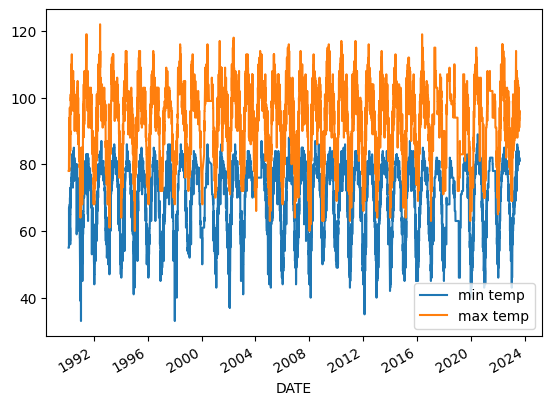

In [23]:
df[["min temp", "max temp"]].plot()

In [24]:
df.groupby(df.index.year).sum()

,precip,avg temp,max temp,min temp
DATE,,,,
1990,0.08,21128,24156.0,18278.0
1991,0.47,22311,25905.0,19366.0
1992,0.00,20733,24228.0,17879.0
1993,0.00,25212,29101.0,21813.0
1994,1.97,20957,24363.0,17956.0
1995,0.20,21263,24682.0,18268.0
1996,0.00,17418,20048.0,15249.0
1997,2.80,14778,17095.0,12646.0
1998,1.10,13811,15980.0,12029.0


In [25]:
df.isnull().sum()

precip      0
avg temp    0
max temp    1
min temp    0
dtype: int64

In [26]:
df = df.fillna(method="bfill")

In [27]:
df.head()

,precip,avg temp,max temp,min temp
DATE,,,,
1990-02-14,0.0,64,78.0,55.0
1990-02-15,0.0,68,78.0,55.0
1990-02-16,0.0,71,78.0,55.0
1990-02-17,0.0,65,78.0,55.0
1990-02-18,0.0,61,78.0,55.0


ML Model

In [28]:
df["target"] = df.shift(-1)["max temp"]

In [29]:
df.head()

,precip,avg temp,max temp,min temp,target
DATE,,,,,
1990-02-14,0.0,64,78.0,55.0,78.0
1990-02-15,0.0,68,78.0,55.0,78.0
1990-02-16,0.0,71,78.0,55.0,78.0
1990-02-17,0.0,65,78.0,55.0,78.0
1990-02-18,0.0,61,78.0,55.0,78.0


In [30]:
df.tail()

,precip,avg temp,max temp,min temp,target
DATE,,,,,
2023-08-11,0.0,86,95.0,81.0,95.0
2023-08-12,0.0,86,95.0,81.0,96.0
2023-08-13,0.0,87,96.0,81.0,96.0
2023-08-14,0.0,87,96.0,81.0,96.0
2023-08-15,0.0,87,96.0,81.0,NaN


In [31]:
df = df.drop(index = "2023-08-15")

In [32]:
df

,precip,avg temp,max temp,min temp,target
DATE,,,,,
1990-02-14,0.0,64,78.0,55.0,78.0
1990-02-15,0.0,68,78.0,55.0,78.0
1990-02-16,0.0,71,78.0,55.0,78.0
1990-02-17,0.0,65,78.0,55.0,78.0
1990-02-18,0.0,61,78.0,55.0,78.0
...,...,...,...,...,...
2023-08-10,0.0,85,94.0,81.0,95.0
2023-08-11,0.0,86,95.0,81.0,95.0
2023-08-12,0.0,86,95.0,81.0,96.0


In [33]:
from sklearn.linear_model import Ridge
reg  = Ridge(alpha=0.1)
predictors = ["precip", "min temp", "max temp"]
train = df.loc[:"2020-12-31"]
test = df.loc["2021-01-01":]

In [34]:
reg.fit(train[predictors], train["target"])

Ridge(alpha=0.1)

In [35]:
predictions = reg.predict(test[predictors])

In [36]:
from sklearn.metrics import mean_absolute_error

In [37]:
mean_absolute_error(test['target'], predictions)

1.9803909143677094

In [38]:
combined = pd.concat([test["target"], pd.Series(predictions, index = test.index)], axis=1)
combined.columns = ["actual", "predicts"]

In [39]:
combined

,actual,predicts
DATE,,
2021-01-01,70.0,71.046850
2021-01-02,70.0,71.304171
2021-01-03,70.0,71.304171
2021-01-04,70.0,71.304171
2021-01-05,70.0,71.304171
...,...,...
2023-08-10,95.0,94.879216
2023-08-11,95.0,95.761440
2023-08-12,96.0,95.761440


<Axes: xlabel='DATE'>

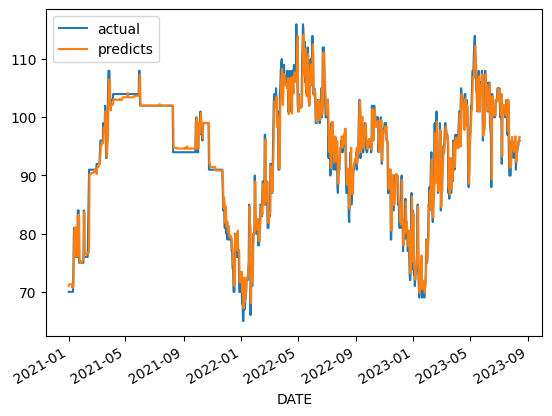

In [40]:
combined.plot()

In [41]:
def weather_model(predictors, df, reg):
  train = df.loc[:"2020-12-31"]
  test = df.loc["2021-01-01":]
  reg.fit(train[predictors], train["target"])
  predictions = reg.predict(test[predictors])
  error = mean_absolute_error(test['target'], predictions)
  combined = pd.concat([test["target"], pd.Series(predictions, index = test.index)], axis=1)
  combined.columns = ["actual", "predicts"]
  return error, combined

In [43]:
print(weather_model(predictors, df, reg))

(1.9803909143677094,             actual   predicts
DATE                         
2021-01-01    70.0  71.046850
2021-01-02    70.0  71.304171
2021-01-03    70.0  71.304171
2021-01-04    70.0  71.304171
2021-01-05    70.0  71.304171
...            ...        ...
2023-08-10    95.0  94.879216
2023-08-11    95.0  95.761440
2023-08-12    96.0  95.761440
2023-08-13    96.0  96.643665
2023-08-14    96.0  96.643665

[930 rows x 2 columns])
